In [1]:
import numpy as np
from numpy import sqrt
from scipy import constants
from matplotlib import pyplot as plt

import lattices, particles, qs_solver

EV = constants.e/constants.h

### Initialise the lattice

Set up a honeycomb lattice with lattice constant $a_0 = 30~\mathrm{nm}$.

In [2]:
test_lattice = lattices.Honeycomb(lattice_constant = 30E-9 * sqrt(3))
print(test_lattice)

Breathing honeycomb lattice: a0 = 51.96 nm, R0 = 30.00 nm


### Initialise the nanoparticle
Set up a spherical silver NP with $r = h = 10~\mathrm{nm}$.

In [3]:
silver = particles.Metal()
sphere_np = particles.Particle(radius = 10E-9, height = 10E-9, material = silver)
print(sphere_np)

Particle: r = 10.0 nm, h = 10.0 nm, w_p = 8.9 eV, loss = 0.038 eV, eps_inf = 5, eps_m = 1


### Set up solver

Calculate quasistatic band structure with grid size = 64.

In [5]:
qs = qs_solver.Quasistatic(test_lattice, sphere_np, neighbours = 40)
grid = 64
xy, z = qs.bands(grid)

### Plot the bands

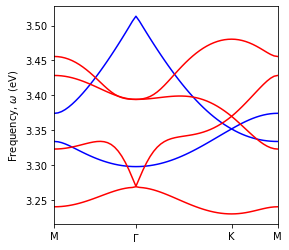

In [6]:
fig, ax = plt.subplots(1, figsize = (4, 4))

ax.plot(z/EV, c='b')
ax.plot(xy/EV, c='r')

labels = test_lattice.get_bz_labels(grid)
ax.set_xticks(list(labels.keys()))
ax.set_xticklabels(labels.values())

ax.set_xlim(0, grid-1)

ax.set_ylabel(r'Frequency, $\omega$ (eV)')

plt.show()

### Another example with a kagome lattice

Let the lattice constant $a_0 = 50\sqrt{3}~\mathrm{nm}$. We will use spheroidal silver NPs, with $r = 10~\mathrm{nm}$ and $h = 20~\mathrm{nm}$ to split the in-plane and out-of-plane modes.

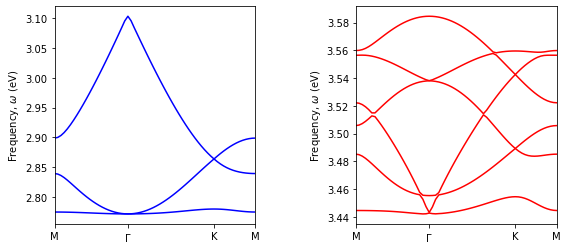

In [8]:
kagome = lattices.Kagome(lattice_constant = 50E-9 * sqrt(3))

spheroid_np = particles.Particle(radius = 10E-9, height = 20E-9)

qs = qs_solver.Quasistatic(kagome, spheroid_np, neighbours = 20)
grid = 64
xy, z = qs.bands(grid)

fig, ax = plt.subplots(1, 2, figsize = (9, 4))
fig.subplots_adjust(wspace=0.5)

ax[0].plot(z/EV, c='b')
ax[1].plot(xy/EV, c='r')

for axis in ax:
    labels = test_lattice.get_bz_labels(grid)
    axis.set_xticks(list(labels.keys()))
    axis.set_xticklabels(labels.values())

    axis.set_xlim(0, grid-1)

    axis.set_ylabel(r'Frequency, $\omega$ (eV)')

plt.show()
